In [1]:
#======================================================
#      PCA
#======================================================

from __future__ import division, print_function, absolute_import
import numpy as np
from PIL import Image
import matplotlib
matplotlib.use('TkAgg')
np.random.seed(2339784) # random seed for consistency

In [2]:
#------------------------------------------------------
#      Data setup
#------------------------------------------------------

img = Image.open("Robot2s.png", "r")
data = img.convert("1").getdata()
bytes = np.array(data)
bytes = np.reshape(bytes, (298, 298))

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[50,0,0],[0,50,0],[0,0,100]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 12332).T
count = 0
for i in range(0, 297):
    for j in range (0, 297):
        if bytes[i][j] == 0:
            class1_sample[0][count]  += i
            class1_sample[1][count]  += j
            class1_sample[2][count]  += i
            count = count + 1
assert class1_sample.shape == (3,12332), "The matrix has not the dimensions 3x12332"

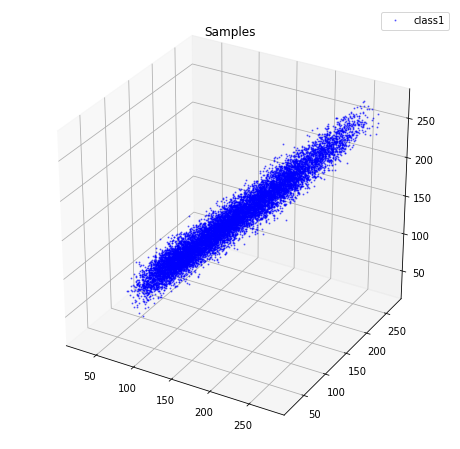

In [3]:
#------------------------------------------------------
#      Plotting the data
#------------------------------------------------------

from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=1, color='blue', alpha=0.5, label='class1')

plt.title('Samples')
ax.legend(loc='upper right')

plt.show()

all_samples = class1_sample
assert all_samples.shape == (3,12332), "The matrix has not the dimensions 3x24664"

In [4]:
#------------------------------------------------------
#      Compute the mean
#------------------------------------------------------

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[147.59899113]
 [145.47746749]
 [147.56387546]]


In [5]:
#------------------------------------------------------
#      TASK 1:  Compute the covariance matrix
#------------------------------------------------------

cov_mat = np.zeros((3,3))
#    COMPUTE THE COVARIANCE MATRIX HERE!!!

print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[4080.56803083   96.28252584 4028.79969161]
 [  96.28252584 1572.75113592  101.2754879 ]
 [4028.79969161  101.2754879  4126.99437169]]


In [6]:
#------------------------------------------------------
#      TASK 2: Compute the eigevalue/vector pairs
#------------------------------------------------------

#    COMPUTE THE EIGENVECTORS AND EIGENVALUES FOR THE FROM THE COVARIANCE MATRIX HERE!!!
#    eig_val_cov, eig_vec_cov
for i in range(len(eig_val_cov)):
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvalue 1 from covariance matrix: 8135.621659189443
----------------------------------------
Eigenvalue 2 from covariance matrix: 74.90809196770208
----------------------------------------
Eigenvalue 3 from covariance matrix: 1569.7837872832142
----------------------------------------


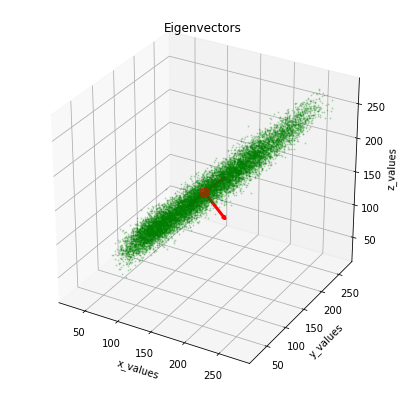

In [7]:
#------------------------------------------------------
#      Plot the eigenvectors
#------------------------------------------------------

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

sf = 50
ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=1, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]*sf+mean_x], [mean_y, v[1]*sf+mean_y], [mean_z, v[2]*sf+mean_z], mutation_scale=5, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [8]:
#------------------------------------------------------
#      TASK 3: Sort the eigenvectors per the eigenvalue norms
#------------------------------------------------------

#    SORT THE (EIGENVALUE, EIGENVECTOR) TUPLES FROM HIGH TO LOW HERE!



# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

8135.621659189443
1569.7837872832142
74.90809196770208


In [9]:
#------------------------------------------------------
#      TASK 4: Compute the projection matrix
#------------------------------------------------------

#    COMPUTE THE PROJECTION MATRIX matrix_w HERE!

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.70490122  0.01648896]
 [ 0.02128224 -0.99977132]
 [ 0.70898614  0.01361703]]


In [10]:
#------------------------------------------------------
#      TASK 5: Project onto the new base
#------------------------------------------------------

#     PROJECT THE all_samples TO A MATRIX trensformed HERE!

assert transformed.shape == (2,12332), "The matrix has not the dimensions 2x12332"

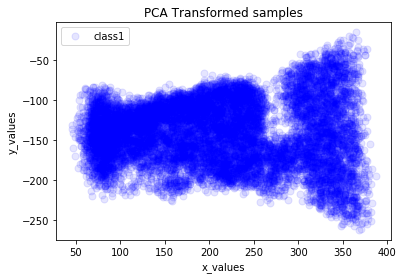

In [11]:
#------------------------------------------------------
#      Plot the result
#------------------------------------------------------

plt.plot(transformed[0,0:12332], transformed[1,0:12332], 'o', markersize=7, color='blue', alpha=0.1, label='class1')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('PCA Transformed samples')
plt.show()

In [12]:
#======================================================
#      Autoencoder
#======================================================
import tensorflow as tf
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [13]:
#=================================================================
#      Data setup
#=================================================================

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

#=================================================================
#      Parameters
#=================================================================

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
#=================================================================
#      Model setup
#=================================================================

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

In [15]:
#------------------------------------------------------
#    TASK 1: finish the correct initialization of tensors for the dictionary
#------------------------------------------------------
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': # TODO
    'decoder_h1': # TODO
    'decoder_h2': # TODO
}
biases = {
    'encoder_b1': # TODO
    'encoder_b2': # TODO
    'decoder_b1': # TODO
    'decoder_b2': # TODO
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2

In [16]:
#------------------------------------------------------
#     TASK 2: Building the decoder
#------------------------------------------------------
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = #TODO
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = #TODO 
    
    return layer_2

# Construct model
encoder_op = encoder(X)

In [17]:
#------------------------------------------------------
#    TASK 3: finish up the model
#------------------------------------------------------
decoder_op = #TODO

In [18]:
#------------------------------------------------------
#    TASK 4: prediction and label
#------------------------------------------------------
y_pred = #TODO
y_true = #TODO

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 0.198833421
Epoch: 0002 cost= 0.168251500
Optimization Finished!


c:\windows\system32\psiml\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


KeyboardInterrupt: 

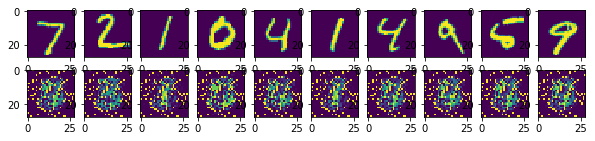

In [19]:
#=================================================================
#      Training
#=================================================================
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, examples_to_show, figsize=(examples_to_show, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()
    #plt.waitforbuttonpress()